<a href="https://colab.research.google.com/github/leowu4ever/PhD_Note/blob/master/ICBHI_dataset_conference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House keeping

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import librosa
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa.display
import librosa.feature
import IPython.display as ipd
import datetime
from IPython.display import clear_output

!pip install pyhht
from pyhht.visualization import plot_imfs
import pyhht
import numpy as np
from pyhht import EMD

from scipy.signal import butter, lfilter, hilbert, chirp
from pyhht.utils import get_envelops, inst_freq
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leowu4ever","key":"aa02345562758f8631f54b8edae33ad6"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vbookshelf/respiratory-sound-database
!mkdir ICBHI_dataset
!unzip respiratory-sound-database.zip -d ICBHI_dataset
!unzip ICBHI_dataset/Respiratory_Sound_Database.zip -d ICBHI_dataset/

In [0]:
anno = pd.read_csv('/content/drive/My Drive/colab PhD/clinic_dataset/annotations_updated.csv', index_col=0)
sr = 4000
w = int(0.25 * sr)
folder_path = '/content/ICBHI_dataset/Respiratory_Sound_Database/audio_and_txt_files/'

# Pre processing

In [0]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def normalise(clip):
    normalised_clip = librosa.util.normalize(clip)
    return normalised_clip

def hamming_window(clip):
    hamming_window = np.hamming(len(clip))
    hamming_windowed_clip = clip * hamming_window
    return hamming_windowed_clip


# Apps

In [0]:
#@title Plot comparison
a_index = 4729 #@param {type:"integer"}
b_index = 3455 #@param {type:"integer"}

a_wav_name = anno.loc[a_index, 'wav_name']
a_wav_start = anno.loc[a_index, 'start']
a_wav_end = anno.loc[a_index, 'end']
a_wav = librosa.load(folder_path+a_wav_name, sr=sr)[0][int(a_wav_start*sr) : int(a_wav_end*sr)]
a_wav_imfs = EMD(a_wav).decompose()

b_wav_name = anno.loc[b_index, 'wav_name']
b_wav_start = anno.loc[b_index, 'start']
b_wav_end = anno.loc[b_index, 'end']
b_wav = librosa.load(folder_path+b_wav_name, sr=sr)[0][int(b_wav_start*sr) : int(b_wav_end*sr)]
b_wav_imfs = EMD(b_wav).decompose()

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20,10))

D = np.abs(librosa.stft(a_wav))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[0,0])

D = np.abs(librosa.stft(a_wav_imfs[0]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[1,0])

D = np.abs(librosa.stft(a_wav_imfs[1]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[2,0])

D = np.abs(librosa.stft(a_wav_imfs[2]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[3,0])

D = np.abs(librosa.stft(a_wav_imfs[3]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[4,0])

D = np.abs(librosa.stft(b_wav))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[0,1])

D = np.abs(librosa.stft(b_wav_imfs[0]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[1,1])

D = np.abs(librosa.stft(b_wav_imfs[1]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[2,1])

D = np.abs(librosa.stft(b_wav_imfs[2]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[3,1])

D = np.abs(librosa.stft(b_wav_imfs[3]))
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=4000, ax=axs[4,1])

axs[0,0].set_title(anno.loc[a_index, 'wav_name'] + ' ' + anno.loc[a_index, 'health status'] )
axs[0,1].set_title(anno.loc[b_index, 'wav_name'] + ' ' + anno.loc[b_index, 'health status'] )

In [0]:
#@title Look up index { run: "auto" }
health_status = "Bronchiolitis" #@param ['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis', 'Pneumonia', 'Bronchiolitis']
crackle = "1" #@param ["0", "1"]
wheeze = "0" #@param ["0", "1"]
chest_loc = "Al" #@param ['Al', 'Pr', 'Ar', 'Ll', 'Lr', 'Pl', 'Tc']
acquisition_mode = "sc" #@param ["sc", "mc"]
recording_equipment = "Meditron" #@param ['Meditron', 'LittC2SE', 'Litt3200', 'AKGC417L']
anno[
    (anno['health status'] == health_status) &
    (anno['crackles'] == int(crackle)) &
    (anno['wheezes'] == int(wheeze)) &
    (anno['chest loc'] == chest_loc) &
    (anno['acquisition mode'] == acquisition_mode) &
    (anno['recording equipment'] == recording_equipment)
]

In [293]:
#@title Play a cycle

a_index = 4734 #@param {type:"integer"}
a_wav_name = anno.loc[a_index, 'wav_name']
a_wav_start = anno.loc[a_index, 'start']
a_wav_end = anno.loc[a_index, 'end']
a_wav = librosa.load(folder_path+a_wav_name, sr=sr)[0][int(a_wav_start*sr) : int(a_wav_end*sr)]
anno.iloc[a_index:a_index+1,:]
ipd.Audio(data=a_wav, rate=sr)

,start,end,crackles,wheezes,wav_name,participant id,recording id,chest loc,acquisition mode,recording equipment,health status,Age,Sex,BMI (kg/m2),Weight (kg),Height (cm)),cycle class
4734,17.407,19.964,0.0,0.0,179_1b1_Al_sc_Meditron.wav,179,1b1,Al,sc,Meditron,Healthy,10.0,F,NaN,15.0,104.0,normal


Text(0.5, 1.0, 'original')

Text(0.5, 1.0, 'bandpass')

Text(0.5, 1.0, 'hamming window')

Text(0.5, 1.0, 'normalised')

Text(0.5, 1.0, 'EMD decomposed first 4 IMFs')

Text(0.5, 1.0, 'Hilbert transform - instantaneous frequency')

Text(0.5, 1.0, 'STFT')

Text(0.5, 0.98, 'cycle index(2)  101_1b1_Al_sc_Meditron.wav')

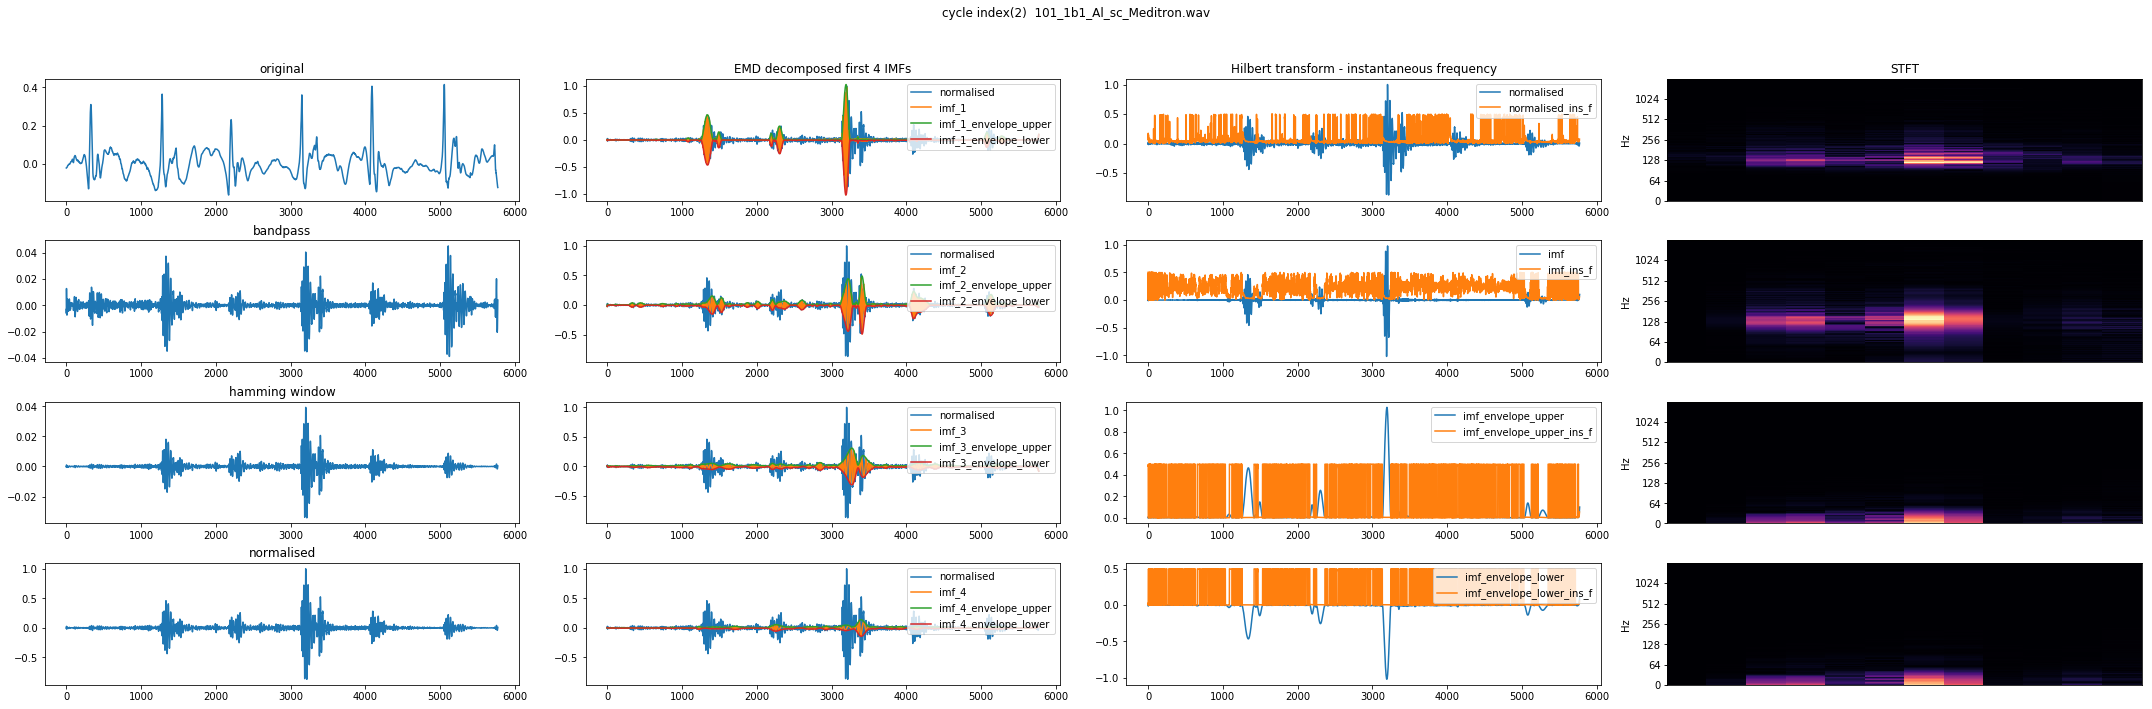

In [284]:
#@title Plot preprocessing

a_index = 2 #@param {type:"integer"}
imf_displayed = 1 #@param {type:"integer"}

a_wav_name = anno.loc[a_index, 'wav_name']
a_wav_start = anno.loc[a_index, 'start']
a_wav_end = anno.loc[a_index, 'end']
a_wav = librosa.load(folder_path+a_wav_name, sr=sr)[0][int(a_wav_start*sr) : int(a_wav_end*sr)]

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,10))

# preprocessing plot
axs[0,0].plot(a_wav)
axs[0,0].set_title('original')

a_wav = butter_bandpass_filter(a_wav, 120, 1800, fs=sr, order=12)
axs[1,0].plot(a_wav)
axs[1,0].set_title('bandpass')

a_wav = hamming_window(a_wav)
axs[2,0].plot(a_wav)
axs[2,0].set_title('hamming window')

a_wav = normalise(a_wav)
axs[3,0].plot(a_wav)
axs[3,0].set_title('normalised')

# EMD imfs plot
imfs = pyhht.emd.EMD(a_wav, n_imfs=4).decompose()
imf = imfs[0]
upper = get_envelops(imf)[0]
lower = get_envelops(imf)[1]
axs[0,1].plot(a_wav, label='normalised')
axs[0,1].plot(imf, label='imf_1')
axs[0,1].plot(upper, label='imf_1_envelope_upper')
axs[0,1].plot(lower, label='imf_1_envelope_lower')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('EMD decomposed first 4 IMFs')

imf = imfs[1]
upper = get_envelops(imf)[0]
lower = get_envelops(imf)[1]
axs[1,1].plot(a_wav, label='normalised')
axs[1,1].plot(imf, label='imf_2')
axs[1,1].plot(upper, label='imf_2_envelope_upper')
axs[1,1].plot(lower, label='imf_2_envelope_lower')
axs[1,1].legend(loc='upper right')

imf = imfs[2]
upper = get_envelops(imf)[0]
lower = get_envelops(imf)[1]
axs[2,1].plot(a_wav, label='normalised')
axs[2,1].plot(imf, label='imf_3')
axs[2,1].plot(upper, label='imf_3_envelope_upper')
axs[2,1].plot(lower, label='imf_3_envelope_lower')
axs[2,1].legend(loc='upper right')

imf = imfs[3]
upper = get_envelops(imf)[0]
lower = get_envelops(imf)[1]
axs[3,1].plot(a_wav, label='normalised')
axs[3,1].plot(imf, label='imf_4')
axs[3,1].plot(upper, label='imf_4_envelope_upper')
axs[3,1].plot(lower, label='imf_4_envelope_lower')
axs[3,1].legend(loc='upper right')

# hilbert transform
imf = imfs[imf_displayed-1]
upper = get_envelops(imf)[0]
lower = get_envelops(imf)[1]
analytic_signal = hilbert(a_wav)
f, t = inst_freq(analytic_signal)
axs[0,2].plot(a_wav, label='normalised')
axs[0,2].plot(f, label='normalised_ins_f')
axs[0,2].legend(loc='upper right')
axs[0,2].set_title('Hilbert transform - instantaneous frequency')

analytic_signal = hilbert(imf)
f, t = inst_freq(analytic_signal)
axs[1,2].plot(imf, label='imf')
axs[1,2].plot(f, label='imf_ins_f')
axs[1,2].legend(loc='upper right')

analytic_signal = hilbert(upper)
f, t = inst_freq(analytic_signal)
axs[2,2].plot(upper, label='imf_envelope_upper')
axs[2,2].plot(f, label='imf_envelope_upper_ins_f')
axs[2,2].legend(loc='upper right')

analytic_signal = hilbert(lower)
f, t = inst_freq(analytic_signal)
axs[3,2].plot(lower, label='imf_envelope_lower')
axs[3,2].plot(f, label='imf_envelope_lower_ins_f')
axs[3,2].legend(loc='upper right')

# stft
axs[0,3].set_title('STFT')
D = np.abs(librosa.stft(a_wav))
librosa.display.specshow(D, y_axis='log', sr=sr, ax=axs[0,3])
D = np.abs(librosa.stft(imf))
librosa.display.specshow(D, y_axis='log', sr=sr, ax=axs[1,3])
D = np.abs(librosa.stft(upper))
librosa.display.specshow(D, y_axis='log', sr=sr, ax=axs[2,3])
D = np.abs(librosa.stft(lower))
librosa.display.specshow(D, y_axis='log', sr=sr, ax=axs[3,3])

plt.suptitle('cycle index(' + str(a_index) + ')  ' + anno.loc[a_index, 'wav_name'])
fig.tight_layout()
fig.subplots_adjust(top=0.88)
